In [61]:
import tensorflow_datasets as tfds
import tensorflow as tf
import logging, os

logging.basicConfig(level=logging.INFO)
# logging.basicConfig(level=logging.DEBUG)

BASE_PATH = "../../../../local_data/jheaton/"
DATA_PATH = "../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"class_09_2_keras_xfer_cv/"
os.system("mkdir -p " + OUTPUT_PATH)

0

In [62]:
train_ds, validation_ds = tfds.load("cats_vs_dogs",data_dir=DATA_PATH,split=["train[:40%]", "train[40%:50%]"],as_supervised=True, )# Include labels

INFO:absl:Load dataset info from ../../../../local_data/tfds/cats_vs_dogs/4.0.0
INFO:absl:Reusing dataset cats_vs_dogs (../../../../local_data/tfds/cats_vs_dogs/4.0.0)
INFO:absl:Constructing tf.data.Dataset cats_vs_dogs for split ['train[:40%]', 'train[40%:50%]'], from ../../../../local_data/tfds/cats_vs_dogs/4.0.0


In [63]:
num_train = tf.data.experimental.cardinality(train_ds)
num_test = tf.data.experimental.cardinality(validation_ds)
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_test}")

Number of training samples: 9305
Number of validation samples: 2326


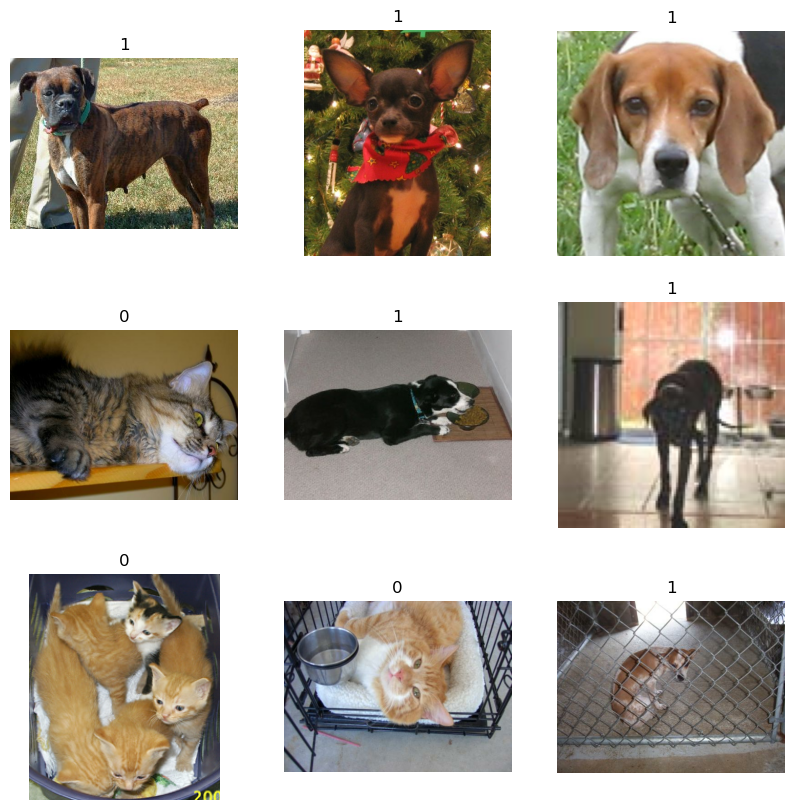

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [65]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: \
                                  (tf.image.resize(x, size), y))

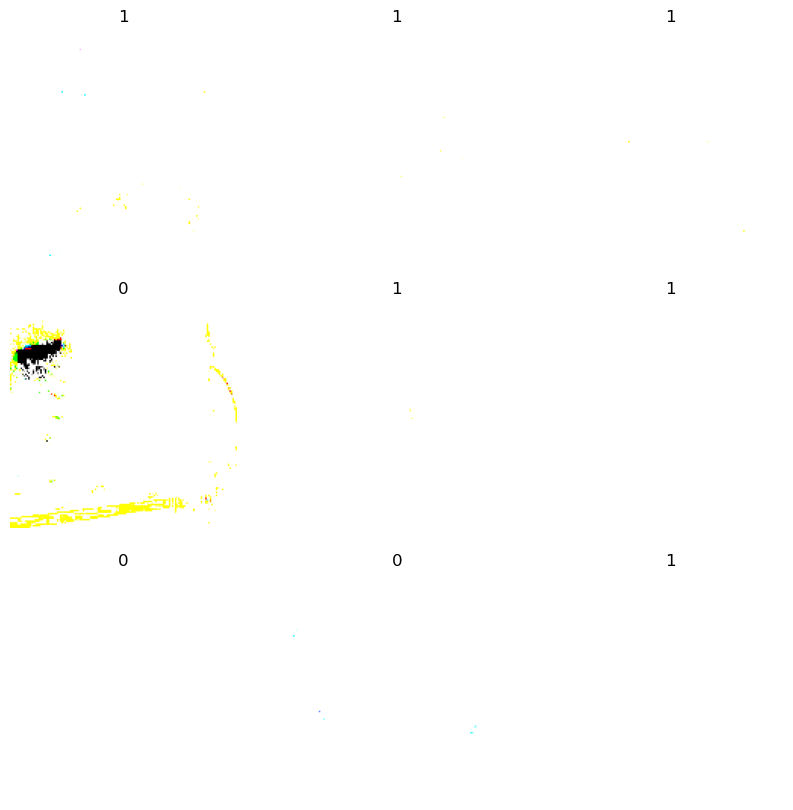

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds2.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    # plt.imshow((image * 255).astype(np.uint8))
    plt.title(int(label))
    plt.axis("off")